In [275]:

import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [276]:
device = "gpu" if torch.cuda.is_available() else "cpu"

In [277]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=4,out_features=1)
        
    def  forward(self,x : torch.tensor) -> torch.Tensor:
        return torch.sigmoid(self.linear_layer(x))
    
def plotting(x,y,predictions = None):
    plt.scatter(x,y,c = "r")
    if predictions is not None:
        plt.scatter(x,predictions,c = "b")



In [278]:
# List of inputs (features of iris flowers)
X = torch.tensor([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 2.8, 4.8, 1.8],
    [7.9, 3.8, 6.4, 2.0],
    [4.9, 3.0, 1.4, 0.2],
    [6.7, 3.1, 4.4, 1.4],
    [5.8, 2.6, 4.0, 1.2],
    [4.8, 3.4, 1.9, 0.2],
    [6.3, 3.3, 6.0, 2.5],
    [5.4, 3.9, 1.7, 0.4],
    [6.1, 2.9, 4.7, 1.4]
],dtype = torch.float32)

# List of outputs (binary class labels: 0 or 1)
y = torch.tensor([0, 1, 1, 0, 1, 1, 0, 1, 0, 1],dtype = torch.float32).unsqueeze(dim = 1)

X.to(device)
y.to(device)

split_percentage = int(0.8*len(X))
X_train , y_train = X[:split_percentage], y[:split_percentage]
X_test,y_test = X[split_percentage:], y[split_percentage:]
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train),dtype = torch.float32)
X_test = torch.tensor(scaler.transform(X_test),dtype=torch.float32)

X_train.to(device)
X_test.to(device)
y_train.to(device)
y_test.to(device)

print(X_train.shape,y_train.shape)



torch.Size([8, 4]) torch.Size([8, 1])


In [279]:
torch.manual_seed(42)
model = LogisticRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3823,  0.4150, -0.1171,  0.4593]], requires_grad=True),
 Parameter containing:
 tensor([-0.1096], requires_grad=True)]

In [280]:
loss = nn.BCELoss()

optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.01,momentum = 0.9)

In [281]:
torch.manual_seed(42)
epochs  = 100
epoch_set = []
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
  
    print(y_preds , y_preds.shape , y_test.shape)
    loss1 = loss(y_preds,y_train)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model.eval()
    epoch_set.append(epoch)
    train_loss.append(loss1.item())
    with torch.inference_mode():
        y_preds_test = model(X_test)
        loss2 = loss(y_preds_test,y_test)
        test_loss.append(loss2.item())
    print("Epoch: {}, Train Loss: {}, Test Loss: {}".format(epoch,loss1.item(),loss2.item()))
    
    
    
    

tensor([[0.3829],
        [0.4532],
        [0.8345],
        [0.2455],
        [0.5387],
        [0.3002],
        [0.3233],
        [0.6734]], grad_fn=<SigmoidBackward0>) torch.Size([8, 1]) torch.Size([2, 1])
Epoch: 0, Train Loss: 0.5430772304534912, Test Loss: 0.8243038058280945
tensor([[0.3807],
        [0.4552],
        [0.8357],
        [0.2443],
        [0.5401],
        [0.3013],
        [0.3214],
        [0.6755]], grad_fn=<SigmoidBackward0>) torch.Size([8, 1]) torch.Size([2, 1])
Epoch: 1, Train Loss: 0.5401927828788757, Test Loss: 0.8160194158554077
tensor([[0.3766],
        [0.4590],
        [0.8380],
        [0.2420],
        [0.5426],
        [0.3034],
        [0.3178],
        [0.6794]], grad_fn=<SigmoidBackward0>) torch.Size([8, 1]) torch.Size([2, 1])
Epoch: 2, Train Loss: 0.5347611308097839, Test Loss: 0.8043475151062012
tensor([[0.3707],
        [0.4644],
        [0.8412],
        [0.2387],
        [0.5463],
        [0.3064],
        [0.3128],
        [0.6849]], grad_f

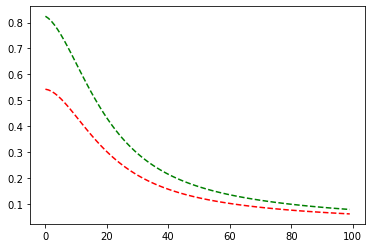

In [282]:
def plot_epoch_loss(epoch,loss,color):
    plt.plot(epoch,loss,color)
plot_epoch_loss(epoch_set,test_loss,color = "g--")
plot_epoch_loss(epoch_set,train_loss,color = "r--")

In [283]:
model.eval()
with torch.inference_mode():
    y_p = model(X_test)
    ll = loss(y_p,y_test)
    

In [284]:
torch.save(model.state_dict(),"models/classifier_model.pth")

In [285]:
import numpy as np

Text(0, 0.5, 'Feature 2')

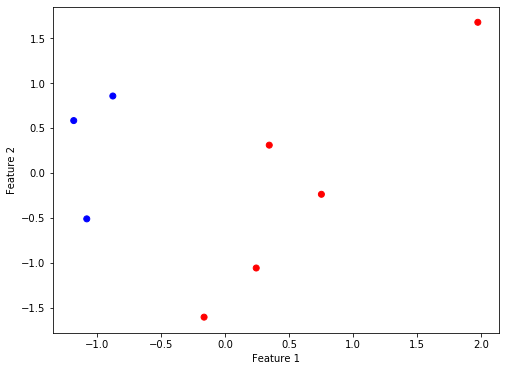

In [286]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.squeeze(), cmap='bwr', label='True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

